In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import fastparquet
import scipy.stats
from great_tables import GT

sys.path.append('../')

from bout_machine import BoutMachine
from bout_randomizer import BoutRandomizer
from boutstr_machine import BoutStringMachine
import visualize.bout_vis as bout_vis
from FileCurtain import FileCurtain

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
groomFileCurtain = FileCurtain('/Users/brogab/Documents/JAXFell25/library/groom_pathlib.txt')
#CSVsearchLogCurtain = FileCurtain('/Users/brogab/Documents/JAXFell25/library/CSVsearchLog_pathlib.txt')
#PARQsearchLogCuratin = FileCurtain('/Users/brogab/Documents/JAXFell25/library/PARQsearchLog_pathlib.txt')
distTestFileCurtain = FileCurtain('/Users/brogab/Documents/JAXFell25/library/DistTestParq_pathlib.txt')

asd_bouts_fpath = groomFileCurtain.fpaths['ASD_bouts']
bxd_bouts_fpath = groomFileCurtain.fpaths['BXD_bouts']
jab_bouts_fpath = groomFileCurtain.fpaths['JAB_bouts']

In [227]:
strat_trans_ref = {
    'tran0': ['01', '02', '03', '04', '05', '06'],
    'tran1': ['10', '12', '13', '14', '15', '16'],
    'tran2': ['20', '21', '23', '24', '25', '26'],
    'tran3': ['30', '31', '32', '34', '35', '36'],
    'tran4': ['40', '41', '42', '43', '45', '46'],
    'tran5': ['50', '51', '52', '53', '54', '56'],
    'tran6': ['60', '61', '62', '63', '64', '65']
}

In [43]:
randomizer = BoutRandomizer(asd_bouts_fpath, 100, 42)

In [51]:
print(randomizer.data.dtypes)
randomizer.data[(randomizer.data['Bout'] == 4) & (randomizer.data['Video_name'] == randomizer.names[0])].head(10)
randomizer.data.head(10)

Start               int64
Duration            int64
State               int64
Video_name         object
NetworkFilename    object
Strain             object
Sex                object
End                 int64
Syntax             object
Ordered_State       int64
Bout                int64
Filtered_State     object
dtype: object


,Start,Duration,State,Video_name,NetworkFilename,Strain,Sex,End,Syntax,Ordered_State,Bout,Filtered_State
0,0,4739,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,4739,Not_Grooming,0,0,0
1,4739,239,0,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,4978,Paw_Lick,1,1,1
2,4978,3,1,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,4981,Bilateral_Face_Wash,2,1,2
3,4981,1179,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,6160,Not_Grooming,0,0,0
4,6160,154,3,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,6314,Genital_Groom,5,2,5
5,6314,923,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7237,Not_Grooming,0,0,0
6,7237,96,3,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7333,Genital_Groom,5,3,5
7,7333,605,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7938,Not_Grooming,0,0,0
8,7938,21,1,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7959,Bilateral_Face_Wash,2,4,2
9,7959,26,0,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7985,Paw_Lick,1,4,1


In [52]:
asd_random = randomizer.randomize(['Video_name', 'Bout'])
#asd_random.head(10)

asd_random[(asd_random['Bout'] == 4) & (asd_random['Video_name'] == randomizer.names[0])].head(10)

,Start,Duration,State,Video_name,NetworkFilename,Strain,Sex,End,Syntax,Ordered_State,Bout,Filtered_State
8,7938,21,1,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7959,Bilateral_Face_Wash,5,4,2
9,7959,26,0,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7985,Paw_Lick,0,4,1
10,7985,51,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,8036,Not_Grooming,0,4,X
11,8036,115,3,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,8151,Genital_Groom,4,4,5
12,8151,29,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,8180,Not_Grooming,1,4,X
13,8180,27,2,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,8207,Flank_Lick,0,4,4
14,8207,9,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,8216,Not_Grooming,2,4,X
15,8216,9,0,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,8225,Paw_Lick,4,4,1
16,8225,14,1,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,8239,Bilateral_Face_Wash,2,4,2
17,8239,71,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,8310,Not_Grooming,1,4,X


In [56]:
asd_origin = pd.read_csv(asd_bouts_fpath)
bxd_origin = pd.read_csv(bxd_bouts_fpath)
jab_origin = pd.read_csv(jab_bouts_fpath)

print(f'# asd vids: {len(np.unique(asd_origin['Video_name']))}')
print(f'# bxd vids: {len(np.unique(bxd_origin['Video_name']))}')
print(f'# jab vids: {len(np.unique(jab_origin['Video_name']))}')

# asd vids: 101
# bxd vids: 892
# jab vids: 1087


# randomized transition comparison ( bout distribution ) 

## ASD 100

In [68]:
rand_asd100_ord = pd.read_parquet(distTestFileCurtain.fpaths['rand_asd100_ord'], engine='fastparquet')
rand_asd100_filt = pd.read_parquet(distTestFileCurtain.fpaths['rand_asd100_filt'], engine='fastparquet')
origin_asd100_ord = pd.read_parquet(distTestFileCurtain.fpaths['origin_asd100_ord'], engine='fastparquet')
origin_asd100_filt = pd.read_parquet(distTestFileCurtain.fpaths['origin_asd100_filt'], engine='fastparquet')

In [88]:
# duration all fucked up
print(rand_asd100_ord.shape)
rand_asd100_filt.head()

(11832, 12)


,target,match_num,match_interval,bout_num,bout_interval,match_pos,bout_pos,duration,sex,strain,video_search_index,video_name
0,12,1,"[8216, 7959]",4,"[8216, 8239]",0.076278,0.076278,[],M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
1,12,2,"[25718, 27228]",13,"[24891, 25699]",0.238769,0.231091,"[163, 15, 133, 7, 21, 117, 98, 741, 40, 32, 34...",M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
2,12,3,"[74383, 74919]",28,"[76731, 77060]",0.690579,0.712378,"[82, 10, 9, 21, 185, 22, 13, 123, 5, 38, 21, 7]",M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
3,12,4,"[76685, 76685]",28,"[76731, 77060]",0.711951,0.712378,[],M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
4,12,5,"[74202, 74584]",28,"[76731, 77060]",0.688899,0.712378,"[10, 9, 87, 55, 123, 39, 38, 21]",M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...


In [166]:
rand_asd100_ord_countdf = (rand_asd100_ord.groupby(['target', 'strain', 'sex'], observed=True).size().reset_index(name='count'))
origin_asd100_ord_countdf = (origin_asd100_ord.groupby(['target', 'strain', 'sex'], observed=True).size().reset_index(name='count'))

rand_asd100_ord_countdf['target'] = rand_asd100_ord_countdf['target'].astype(str)
origin_asd100_ord_countdf['target'] = origin_asd100_ord_countdf['target'].astype(str)

print(rand_asd100_ord_countdf.head())
print(origin_asd100_ord_countdf.head())


  target                         strain sex  count
0     01  B6.129(Cg)-Cntnap2<tm1Pele>/J   F     75
1     01  B6.129(Cg)-Cntnap2<tm1Pele>/J   M     84
2     01        B6.129-Shank3<tm2Gfn>/J   F     76
3     01        B6.129-Shank3<tm2Gfn>/J   M     94
4     01        B6.129P2-Fmr1<tm1Cgr>/J   F     48
  target                         strain sex  count
0     01  B6.129(Cg)-Cntnap2<tm1Pele>/J   F    155
1     01  B6.129(Cg)-Cntnap2<tm1Pele>/J   M    206
2     01        B6.129-Shank3<tm2Gfn>/J   F    138
3     01        B6.129-Shank3<tm2Gfn>/J   M    225
4     01        B6.129P2-Fmr1<tm1Cgr>/J   F     99


### ASD 100 ordered

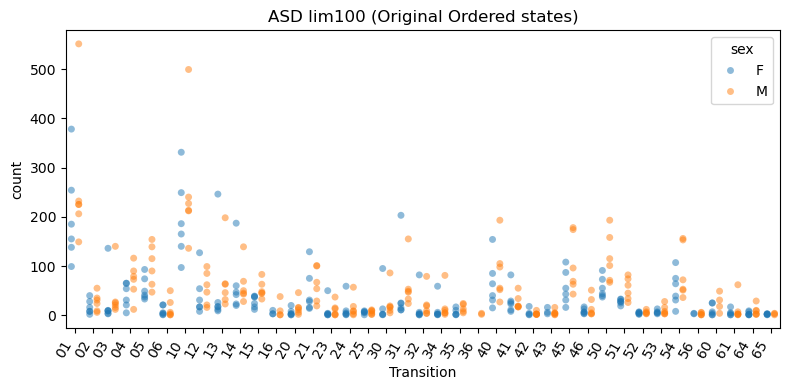

In [183]:
plt.figure(figsize=(8, 4))
ax = sns.stripplot(data=origin_asd100_ord_countdf, x='target', y='count', hue='sex', dodge=True, jitter=False, alpha=0.5)#, height=4, aspect=2)

#plt.ylabel('Count')
plt.xlabel('Transition')
plt.title('ASD lim100 (Original Ordered states)')

#plt.yticks(np.arange(0, 500, 25))

#ax.set_xticklabels(rotation=60, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')

plt.tight_layout()
plt.show()

In [202]:
# Ensure your target columns are strings so they match perfectly
rand_asd100_ord_countdf['target'] = rand_asd100_ord_countdf['target'].astype(str)
origin_asd100_ord_countdf['target'] = origin_asd100_ord_countdf['target'].astype(str)

# 2. Get the list of unique targets found in both datasets
targets = set(rand_asd100_ord_countdf['target']).intersection(set(origin_asd100_ord_countdf['target']))

results = []

for t in targets:
    # 3. Extract the 'count' distribution for this specific target
    # We drop NaNs to ensure the statistical test doesn't error out
    rand_dist = rand_asd100_ord_countdf[rand_asd100_ord_countdf['target'] == t]['count'].dropna()
    origin_mean = origin_asd100_ord_countdf[origin_asd100_ord_countdf['target'] == t]['count'].dropna()

    # 4. Check Sample Size
    # Statistical tests fail or are meaningless with very few data points (e.g., < 3 strains)
    if len(rand_dist) < 3 or len(origin_mean) < 3:
        continue

    # 5. Run the Test (Mann-Whitney U)
    # Null Hypothesis: The distribution of counts is the same in both datasets.
    # Alternative: One dataset systematically has higher/lower counts.
    stat, p_val = scipy.stats.mannwhitneyu(rand_dist, origin_mean, alternative='two-sided')

    # Optional: Kolmogorov-Smirnov Test (Sensitive to shape differences, not just magnitude)
    # ks_stat, ks_pval = stats.ks_2samp(dist1, dist2)

    results.append({
        'target': t,
        'p_value': p_val,
        'rand_mean': rand_dist.mean(),
        'origin_mean': origin_mean.mean(),
        'n_strains_rand': len(rand_dist),
        'n_strains_origin': len(origin_mean),
        'dataset': 'asd100_ord'
    })

# 6. View Results
asd_ord_results_df = pd.DataFrame(results).sort_values('p_value')

# Show the targets with the most significant differences (Lowest p-value)
asd_ord_results_df[(asd_ord_results_df['p_value'] < 0.05) & (asd_ord_results_df['origin_mean'] > asd_ord_results_df['rand_mean'])].head(42)

,target,p_value,rand_mean,origin_mean,n_strains_rand,n_strains_origin,dataset
27,10,0.000996,98.333333,224.583333,12,12,asd100_ord
17,01,0.001489,103.916667,233.083333,12,12,asd100_ord
36,45,0.002909,29.416667,80.250000,12,12,asd100_ord
35,54,0.011057,31.500000,70.416667,12,12,asd100_ord
3,50,0.017901,48.500000,87.083333,12,12,asd100_ord


### ASD 100 filtered

In [174]:
rand_asd100_filt_countdf = (rand_asd100_filt.groupby(['target', 'strain', 'sex'], observed=True).size().reset_index(name='count'))
origin_asd100_filt_countdf = (origin_asd100_filt.groupby(['target', 'strain', 'sex'], observed=True).size().reset_index(name='count'))

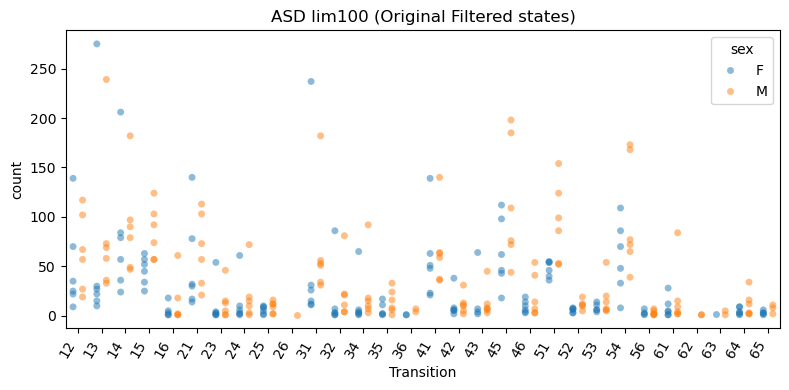

In [182]:
plt.figure(figsize=(8, 4))
ax = sns.stripplot(data=origin_asd100_filt_countdf, x='target', y='count', hue='sex', dodge=True, jitter=False, alpha=0.5)#, height=4, aspect=2)

#plt.ylabel('Count')
plt.xlabel('Transition')
plt.title('ASD lim100 (Original Filtered states)')

#plt.yticks(np.arange(0, 500, 25))

#ax.set_xticklabels(rotation=60, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')

plt.tight_layout()
plt.show()

In [192]:
rand_asd100_filt_countdf['target'] = rand_asd100_filt_countdf['target'].astype(str)
origin_asd100_ord_countdf['target'] = origin_asd100_ord_countdf['target'].astype(str)

targets = set(rand_asd100_filt_countdf['target']).intersection(set(origin_asd100_ord_countdf['target']))

results = []

for t in targets:
    rand_dist = rand_asd100_filt_countdf[rand_asd100_filt_countdf['target'] == t]['count'].dropna()
    origin_dist = origin_asd100_ord_countdf[origin_asd100_ord_countdf['target'] == t]['count'].dropna()

    if len(rand_dist) < 3 or len(origin_dist) < 3:
        continue

    stat, p_val = scipy.stats.mannwhitneyu(rand_dist, origin_dist, alternative='two-sided')
    results.append({
        'target': t,
        'p_value': p_val,
        'rand_mean': rand_dist.mean(),
        'origin_mean': origin_dist.mean(),
        'n_strains_rand': len(rand_dist),
        'n_strains_origin': len(origin_dist),
        'dataset': 'asd100_filt'
    })

asd_filt_results_df = pd.DataFrame(results).sort_values('p_value')

asd_filt_results_df[(asd_filt_results_df['p_value'] < 0.05) & (asd_filt_results_df['origin_mean'] > asd_filt_results_df['rand_mean'])].head(42)

,target,p_value,rand_mean,origin_mean,n_strains_rand,n_strains_origin,dataset
24,45,0.043035,43.666667,80.25,12,12,asd100_filt


## BXD 500

In [92]:
rand_bxd500_ord = pd.read_parquet(distTestFileCurtain.fpaths['rand_bxd500_ord'], engine='fastparquet')
rand_bxd500_filt = pd.read_parquet(distTestFileCurtain.fpaths['rand_bxd500_filt'], engine='fastparquet')
origin_bxd500_ord = pd.read_parquet(distTestFileCurtain.fpaths['origin_bxd500_ord'], engine='fastparquet')
origin_bxd500_filt = pd.read_parquet(distTestFileCurtain.fpaths['origin_bxd500_filt'], engine='fastparquet')

### BXD 500 ordered

In [175]:
rand_bxd500_ord_countdf = (rand_bxd500_ord.groupby(['target', 'strain', 'sex'], observed=True).size().reset_index(name='count'))
origin_bxd500_ord_countdf = (origin_bxd500_ord.groupby(['target', 'strain', 'sex'], observed=True).size().reset_index(name='count'))

In [ ]:
plt.figure(figsize=(8, 4))
ax = sns.stripplot(data=origin_bxd500_ord_countdf, x='target', y='count', hue='sex', dodge=True, jitter=False, alpha=0.5)#, height=4, aspect=2)

#plt.ylabel('Count')
plt.xlabel('01 transition count')
plt.title('ASD lim100 (Original Ordered states)')

#plt.yticks(np.arange(0, 500, 25))

#ax.set_xticklabels(rotation=60, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')

plt.tight_layout()
plt.show()

In [193]:
rand_bxd500_ord_countdf['target'] = rand_bxd500_ord_countdf['target'].astype(str)
origin_bxd500_ord_countdf['target'] = origin_bxd500_ord_countdf['target'].astype(str)

targets = set(rand_bxd500_ord_countdf['target']).intersection(set(origin_bxd500_ord_countdf['target']))

results = []

for t in targets:
    rand_dist = rand_bxd500_ord_countdf[rand_bxd500_ord_countdf['target'] == t]['count'].dropna()
    origin_dist = origin_bxd500_ord_countdf[origin_bxd500_ord_countdf['target'] == t]['count'].dropna()

    if len(rand_dist) < 3 or len(origin_dist) < 3:
        continue

    stat, p_val = scipy.stats.mannwhitneyu(rand_dist, origin_dist, alternative='two-sided')

    results.append({
        'target': t,
        'p_value': p_val,
        'rand_mean': rand_dist.mean(),
        'origin_mean': origin_dist.mean(),
        'n_strains_rand': len(rand_dist),
        'n_strains_origin': len(origin_dist),
        'dataset': 'bxd500_ord'
    })

bxd_ord_results_df = pd.DataFrame(results).sort_values('p_value')

bxd_ord_results_df[(bxd_ord_results_df['p_value'] < 0.05) & (bxd_ord_results_df['origin_mean'] > bxd_ord_results_df['rand_mean'])].head(42)

,target,p_value,rand_mean,origin_mean,n_strains_rand,n_strains_origin,dataset
37,45,1.964006e-19,19.101351,55.261745,148,149,bxd500_ord
36,54,5.424891e-16,18.763514,48.147651,148,149,bxd500_ord
28,10,1.459935e-14,48.553333,109.026667,150,150,bxd500_ord
17,01,3.972042e-14,54.226667,117.026667,150,150,bxd500_ord
9,12,1.602195e-11,13.034965,30.191781,143,146,bxd500_ord
10,13,6.116928e-11,19.041667,47.297297,144,148,bxd500_ord
27,21,2.704368e-10,15.586207,33.116438,145,146,bxd500_ord
18,31,3.354230e-09,21.363636,44.875862,143,145,bxd500_ord
3,50,3.245362e-08,27.067114,46.966443,149,149,bxd500_ord
33,32,8.692836e-08,5.045802,9.883212,131,137,bxd500_ord


### BXD 500 Filtered

In [176]:
rand_bxd500_filt_countdf = (rand_bxd500_filt.groupby(['target', 'strain', 'sex'], observed=True).size().reset_index(name='count'))
origin_bxd500_filt_countdf = (origin_bxd500_filt.groupby(['target', 'strain', 'sex'], observed=True).size().reset_index(name='count'))

In [194]:
rand_bxd500_filt_countdf['target'] = rand_bxd500_filt_countdf['target'].astype(str)
origin_bxd500_filt_countdf['target'] = origin_bxd500_filt_countdf['target'].astype(str)

targets = set(rand_bxd500_filt_countdf['target']).intersection(set(origin_bxd500_filt_countdf['target']))

results = []

for t in targets:
    rand_dist = rand_bxd500_filt_countdf[rand_bxd500_filt_countdf['target'] == t]['count'].dropna()
    origin_dist = origin_bxd500_filt_countdf[origin_bxd500_filt_countdf['target'] == t]['count'].dropna()

    if len(rand_dist) < 3 or len(origin_dist) < 3:
        continue

    stat, p_val = scipy.stats.mannwhitneyu(rand_dist, origin_dist, alternative='two-sided')

    results.append({
        'target': t,
        'p_value': p_val,
        'rand_mean': rand_dist.mean(),
        'origin_mean': origin_dist.mean(),
        'n_strains_rand': len(rand_dist),
        'n_strains_origin': len(origin_dist),
        'dataset': 'bxd500_filt'
    })

bxd_filt_results_df = pd.DataFrame(results).sort_values('p_value')

bxd_filt_results_df[(bxd_filt_results_df['p_value'] < 0.05) & (bxd_filt_results_df['origin_mean'] > bxd_filt_results_df['rand_mean'])].head(42)

,target,p_value,rand_mean,origin_mean,n_strains_rand,n_strains_origin,dataset
26,45,2.741786e-13,26.557047,59.369128,149,149,bxd500_filt
25,54,8.563869e-11,25.248322,51.369128,149,149,bxd500_filt
6,12,2.634217e-07,18.383562,33.342466,146,146,bxd500_filt
7,13,1.258396e-06,28.458904,53.324324,146,148,bxd500_filt
21,21,4.940796e-06,20.541096,34.965753,146,146,bxd500_filt
24,32,1.568764e-05,6.335766,10.401460,137,137,bxd500_filt
14,31,2.618248e-05,29.376712,49.075862,146,145,bxd500_filt
12,46,7.695449e-03,7.054264,9.962963,129,135,bxd500_filt


## JABS1200 500 

In [105]:
rand_jab500_ord = pd.read_parquet(distTestFileCurtain.fpaths['rand_jab500_ord'], engine='fastparquet')
rand_jab500_filt = pd.read_parquet(distTestFileCurtain.fpaths['rand_jab500_filt'], engine='fastparquet')
origin_jab500_ord = pd.read_parquet(distTestFileCurtain.fpaths['origin_jab500_ord'], engine='fastparquet')
origin_jab500_filt = pd.read_parquet(distTestFileCurtain.fpaths['origin_jab500_filt'], engine='fastparquet')

### JABS1200 500 ordered

In [177]:
rand_jab500_ord_countdf = (rand_jab500_ord.groupby(['target', 'strain', 'sex'], observed=True).size().reset_index(name='count'))
origin_jab500_ord_countdf = (origin_jab500_ord.groupby(['target', 'strain', 'sex'], observed=True).size().reset_index(name='count'))

In [195]:
rand_jab500_ord_countdf['target'] = rand_jab500_ord_countdf['target'].astype(str)
origin_jab500_ord_countdf['target'] = origin_jab500_ord_countdf['target'].astype(str)

targets = set(rand_jab500_ord_countdf['target']).intersection(set(origin_jab500_ord_countdf['target']))

results = []

for t in targets:
    rand_dist = rand_jab500_ord_countdf[rand_jab500_ord_countdf['target'] == t]['count'].dropna()
    origin_dist = origin_jab500_ord_countdf[origin_jab500_ord_countdf['target'] == t]['count'].dropna()

    if len(rand_dist) < 3 or len(origin_dist) < 3:
        continue

    stat, p_val = scipy.stats.mannwhitneyu(rand_dist, origin_dist, alternative='two-sided')

    results.append({
        'target': t,
        'p_value': p_val,
        'rand_mean': rand_dist.mean(),
        'origin_mean': origin_dist.mean(),
        'n_strains_rand': len(rand_dist),
        'n_strains_origin': len(origin_dist),
        'dataset': 'jab500_ord'
    })

jab_ord_results_df = pd.DataFrame(results).sort_values('p_value')

jab_ord_results_df[(jab_ord_results_df['p_value'] < 0.05) & (jab_ord_results_df['origin_mean'] > jab_ord_results_df['rand_mean'])].head(42)

,target,p_value,rand_mean,origin_mean,n_strains_rand,n_strains_origin,dataset
28,10,2.466120e-10,50.673684,112.479167,95,96,jab500_ord
17,01,9.094293e-10,57.393617,125.614583,94,96,jab500_ord
37,45,1.393581e-07,19.723404,55.723404,94,94,jab500_ord
36,54,2.577701e-06,19.838710,48.638298,93,94,jab500_ord
3,50,4.506174e-06,29.197917,55.447917,96,96,jab500_ord
9,12,7.577233e-06,17.439560,39.663158,91,95,jab500_ord
10,13,3.333584e-05,16.804598,39.844444,87,90,jab500_ord
14,46,5.267976e-04,4.193548,9.513889,62,72,jab500_ord
30,60,1.892571e-03,6.000000,11.513158,71,76,jab500_ord
33,32,3.036717e-03,6.935897,12.905882,78,85,jab500_ord


### JABS1200 500 filtered

In [178]:
rand_jab500_filt_countdf = (rand_jab500_filt.groupby(['target', 'strain', 'sex'], observed=True).size().reset_index(name='count'))
origin_jab500_filt_countdf = (origin_jab500_filt.groupby(['target', 'strain', 'sex'], observed=True).size().reset_index(name='count'))

In [196]:
rand_jab500_filt_countdf['target'] = rand_jab500_filt_countdf['target'].astype(str)
origin_jab500_filt_countdf['target'] = origin_jab500_filt_countdf['target'].astype(str)

targets = set(rand_jab500_filt_countdf['target']).intersection(set(origin_jab500_filt_countdf['target']))

results = []

for t in targets:
    rand_dist = rand_jab500_filt_countdf[rand_jab500_filt_countdf['target'] == t]['count'].dropna()
    origin_dist = origin_jab500_filt_countdf[origin_jab500_filt_countdf['target'] == t]['count'].dropna()

    if len(rand_dist) < 3 or len(origin_dist) < 3:
        continue

    stat, p_val = scipy.stats.mannwhitneyu(rand_dist, origin_dist, alternative='two-sided')

    results.append({
        'target': t,
        'p_value': p_val,
        'rand_mean': rand_dist.mean(),
        'origin_mean': origin_dist.mean(),
        'n_strains_rand': len(rand_dist),
        'n_strains_origin': len(origin_dist),
        'dataset': 'jab500_filt'
    })

jab_filt_results_df = pd.DataFrame(results).sort_values('p_value')

jab_filt_results_df[(jab_filt_results_df['p_value'] < 0.05) & (jab_filt_results_df['origin_mean'] > jab_filt_results_df['rand_mean'])].head(42)

,target,p_value,rand_mean,origin_mean,n_strains_rand,n_strains_origin,dataset
26,45,0.000035,27.452632,59.842105,95,95,jab500_filt
25,54,0.000157,26.574468,52.712766,94,94,jab500_filt
6,12,0.000543,24.902174,44.747368,92,95,jab500_filt
7,13,0.004028,25.056818,45.087912,88,91,jab500_filt
12,46,0.005034,5.565217,10.959459,69,74,jab500_filt


In [246]:
# concat all data
ord_datasets = ['asd100_ord', 'bxd500_ord', 'jab500_ord']
filt_datasets = ['asd100_filt', 'bxd500_filt', 'jab500_filt']


fulltran_comp = pd.concat([asd_ord_results_df, asd_filt_results_df, bxd_ord_results_df, bxd_filt_results_df, jab_ord_results_df, jab_filt_results_df], ignore_index=True)

In [225]:
fulltran_comp[(fulltran_comp['p_value'] < 0.05) & (fulltran_comp['origin_mean'] > fulltran_comp['rand_mean'])].sort_values('p_value').head(20)

,target,p_value,rand_mean,origin_mean,n_strains_rand,n_strains_origin,dataset
64,45,1.964006e-19,19.101351,55.261745,148,149,bxd500_ord
65,54,5.424891e-16,18.763514,48.147651,148,149,bxd500_ord
66,10,1.459935e-14,48.553333,109.026667,150,150,bxd500_ord
67,01,3.972042e-14,54.226667,117.026667,150,150,bxd500_ord
103,45,2.741786e-13,26.557047,59.369128,149,149,bxd500_filt
68,12,1.602195e-11,13.034965,30.191781,143,146,bxd500_ord
69,13,6.116928e-11,19.041667,47.297297,144,148,bxd500_ord
104,54,8.563869e-11,25.248322,51.369128,149,149,bxd500_filt
133,10,2.466120e-10,50.673684,112.479167,95,96,jab500_ord
71,21,2.704368e-10,15.586207,33.116438,145,146,bxd500_ord


In [214]:
fulltran_comp[(fulltran_comp['p_value'] < 0.05) & (fulltran_comp['origin_mean'] > fulltran_comp['rand_mean']) & (fulltran_comp['dataset'].isin(ord_datasets))].sort_values('p_value').head(20)

,target,p_value,rand_mean,origin_mean,n_strains_rand,n_strains_origin,dataset
37,45,1.964006e-19,19.101351,55.261745,148,149,bxd500_ord
36,54,5.424891e-16,18.763514,48.147651,148,149,bxd500_ord
28,10,1.459935e-14,48.553333,109.026667,150,150,bxd500_ord
17,01,3.972042e-14,54.226667,117.026667,150,150,bxd500_ord
9,12,1.602195e-11,13.034965,30.191781,143,146,bxd500_ord
10,13,6.116928e-11,19.041667,47.297297,144,148,bxd500_ord
28,10,2.466120e-10,50.673684,112.479167,95,96,jab500_ord
27,21,2.704368e-10,15.586207,33.116438,145,146,bxd500_ord
17,01,9.094293e-10,57.393617,125.614583,94,96,jab500_ord
18,31,3.354230e-09,21.363636,44.875862,143,145,bxd500_ord


In [212]:
fulltran_comp[(fulltran_comp['p_value'] < 0.05) & (fulltran_comp['origin_mean'] > fulltran_comp['rand_mean']) & (fulltran_comp['dataset'].isin(filt_datasets))].sort_values('p_value').head(20)

,target,p_value,rand_mean,origin_mean,n_strains_rand,n_strains_origin,dataset
26,45,2.741786e-13,26.557047,59.369128,149,149,bxd500_filt
25,54,8.563869e-11,25.248322,51.369128,149,149,bxd500_filt
6,12,2.634217e-07,18.383562,33.342466,146,146,bxd500_filt
7,13,1.258396e-06,28.458904,53.324324,146,148,bxd500_filt
21,21,4.940796e-06,20.541096,34.965753,146,146,bxd500_filt
24,32,1.568764e-05,6.335766,10.401460,137,137,bxd500_filt
14,31,2.618248e-05,29.376712,49.075862,146,145,bxd500_filt
26,45,3.504991e-05,27.452632,59.842105,95,95,jab500_filt
25,54,1.574105e-04,26.574468,52.712766,94,94,jab500_filt
6,12,5.427832e-04,24.902174,44.747368,92,95,jab500_filt


In [278]:

fulltran_comp[(fulltran_comp['dataset'] == 'asd100_ord') &
              (fulltran_comp['p_value'] < 5) & 
              (fulltran_comp['origin_mean'] > fulltran_comp['rand_mean']) & 
              (fulltran_comp['target'].isin(strat_trans_ref['tran0']))].sort_values('p_value').head(20)

,target,p_value,rand_mean,origin_mean,n_strains_rand,n_strains_origin,dataset
1,01,0.001489,103.916667,233.083333,12,12,asd100_ord
8,05,0.073426,51.166667,77.916667,12,12,asd100_ord
20,04,0.259614,40.750000,55.333333,12,12,asd100_ord
24,03,0.401889,20.166667,34.333333,12,12,asd100_ord
26,02,0.418316,17.083333,21.833333,12,12,asd100_ord
35,06,0.947022,10.500000,11.750000,10,12,asd100_ord


In [301]:
count_datasets = {'asd100_ord': origin_asd100_ord_countdf,
                  'bxd500_ord': origin_bxd500_ord_countdf,
                  'jab500_ord': origin_jab500_ord_countdf,
                  'asd100_filt': origin_asd100_filt_countdf,
                  'bxd500_filt': origin_bxd500_filt_countdf,
                  'jab500_filt': origin_jab500_filt_countdf}
sig_thresh = 0.05
for dataset in count_datasets.keys():
    print(f'dataset -> {dataset}')
    for targ in strat_trans_ref.keys():
        slice = fulltran_comp[(fulltran_comp['dataset'] == dataset) &
                          (fulltran_comp['p_value'] < sig_thresh) &
                          (fulltran_comp['origin_mean'] > fulltran_comp['rand_mean']) &
                          (fulltran_comp['target'].isin(strat_trans_ref[targ]))].sort_values('p_value').reset_index()
        if slice.shape[0] != 0:
            #print(slice.shape)
            count_df = count_datasets[dataset]
            #winner = slice[slice['origin_mean'] == np.max(slice['origin_mean'])]
            winner = slice.iloc[np.argmax(slice['origin_mean']/slice['n_strains_origin'], axis=0)]
            #print(type(winner))
            #print(winner.shape)
            #print(winner)
            total_01 = np.sum(count_df[count_df['target'] == winner['target']]['count'])
            total_0X = np.sum(count_df[count_df['target'].isin(strat_trans_ref[targ])]['count'])
            print(f'    target: {targ} -> {winner['target']}, p_val: {winner['p_value']}, {(total_01 / total_0X) * 100:.4f}% ')
        else:
            print(f'    target: {targ} -> No significance')

dataset -> asd100_ord
    target: tran0 -> 01, p_val: 0.0014890558018865203, 53.6749% 
    target: tran1 -> 10, p_val: 0.0009961487851671293, 50.5155% 
    target: tran2 -> No significance
    target: tran3 -> No significance
    target: tran4 -> 45, p_val: 0.0029085643666937324, 38.8306% 
    target: tran5 -> 50, p_val: 0.017901419873949907, 40.9322% 
    target: tran6 -> No significance
dataset -> bxd500_ord
    target: tran0 -> 01, p_val: 3.972041636512855e-14, 53.7329% 
    target: tran1 -> 10, p_val: 1.4599345392811363e-14, 41.8336% 
    target: tran2 -> 21, p_val: 2.7043677812714706e-10, 63.3434% 
    target: tran3 -> 31, p_val: 3.3542301303177795e-09, 55.0228% 
    target: tran4 -> 45, p_val: 1.96400609947553e-19, 49.5875% 
    target: tran5 -> 54, p_val: 5.424891367192323e-16, 35.2513% 
    target: tran6 -> 60, p_val: 0.0029245530642890353, 48.4720% 
dataset -> jab500_ord
    target: tran0 -> 01, p_val: 9.094292813609967e-10, 54.1734% 
    target: tran1 -> 10, p_val: 2.46612049

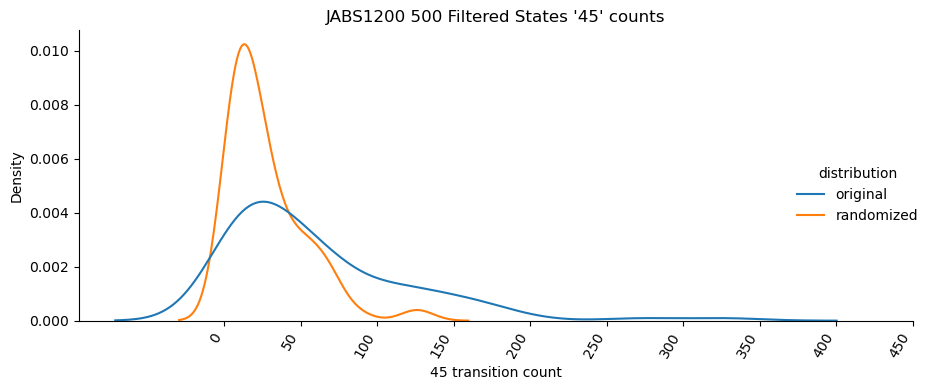

In [342]:
test_tran = '45'

origin_boot_df = origin_jab500_filt_countdf.copy()
origin_boot_df['distribution'] = 'original'

rand_boot_df = rand_jab500_filt_countdf.copy()
rand_boot_df['distribution'] = 'randomized'


boot_df = pd.concat([origin_boot_df, rand_boot_df], axis=0)
#print(boot_df.head())
#print(boot_df['distribution'].unique())

ax = sns.displot(data=boot_df[boot_df['target'] == test_tran], x='count', hue='distribution', kind='kde', height=4, aspect=2)

#plt.ylabel('Count')
plt.xlabel(f'{test_tran} transition count')
plt.title(f"JABS1200 500 Filtered States '{test_tran}' counts")

#plt.yticks(np.arange(0, 500, 25))
plt.xticks(np.arange(0, 500, 50))

ax.set_xticklabels(rotation=60, horizontalalignment='right')

plt.tight_layout()
plt.show()

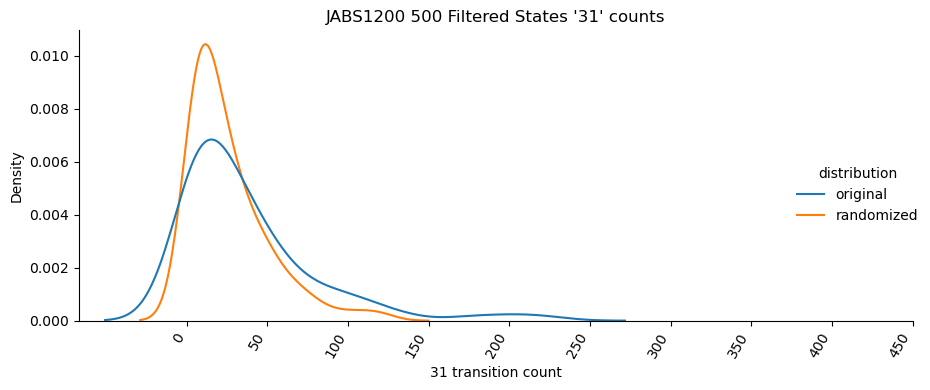

In [343]:
test_tran = '31'

origin_boot_df = origin_jab500_filt_countdf.copy()
origin_boot_df['distribution'] = 'original'

rand_boot_df = rand_jab500_filt_countdf.copy()
rand_boot_df['distribution'] = 'randomized'


boot_df = pd.concat([origin_boot_df, rand_boot_df], axis=0)
#print(boot_df.head())
#print(boot_df['distribution'].unique())

ax = sns.displot(data=boot_df[boot_df['target'] == test_tran], x='count', hue='distribution', kind='kde', height=4, aspect=2)

#plt.ylabel('Count')
plt.xlabel(f'{test_tran} transition count')
plt.title(f"JABS1200 500 Filtered States '{test_tran}' counts")

#plt.yticks(np.arange(0, 500, 25))
plt.xticks(np.arange(0, 500, 50))

ax.set_xticklabels(rotation=60, horizontalalignment='right')

plt.tight_layout()
plt.show()

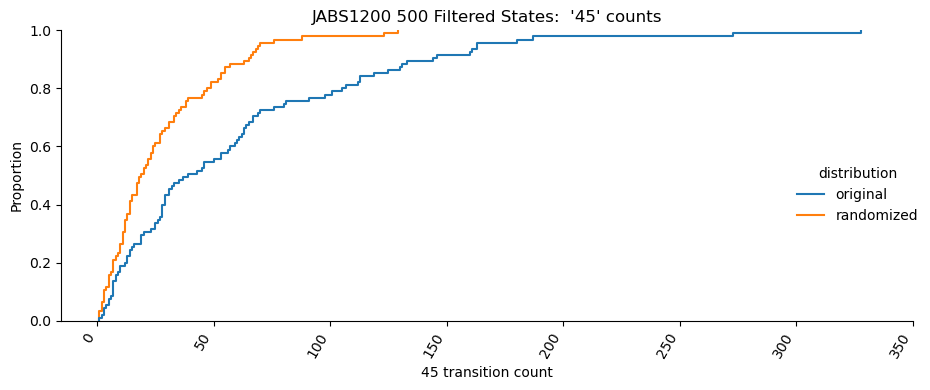

In [350]:
test_tran = '45'

origin_boot_df = origin_jab500_filt_countdf.copy()
origin_boot_df['distribution'] = 'original'

rand_boot_df = rand_jab500_filt_countdf.copy()
rand_boot_df['distribution'] = 'randomized'


boot_df = pd.concat([origin_boot_df, rand_boot_df], axis=0)
#print(boot_df.head())
#print(boot_df['distribution'].unique())

ax = sns.displot(data=boot_df[boot_df['target'] == test_tran], x='count', hue='distribution', kind='ecdf', height=4, aspect=2)

#plt.ylabel('Count')
plt.xlabel(f'{test_tran} transition count')
plt.title(f"JABS1200 500 Filtered States:  '{test_tran}' counts")

#plt.yticks(np.arange(0, 500, 25))
plt.xticks(np.arange(0, 400, 50))

ax.set_xticklabels(rotation=60, horizontalalignment='right')

plt.tight_layout()
plt.show()

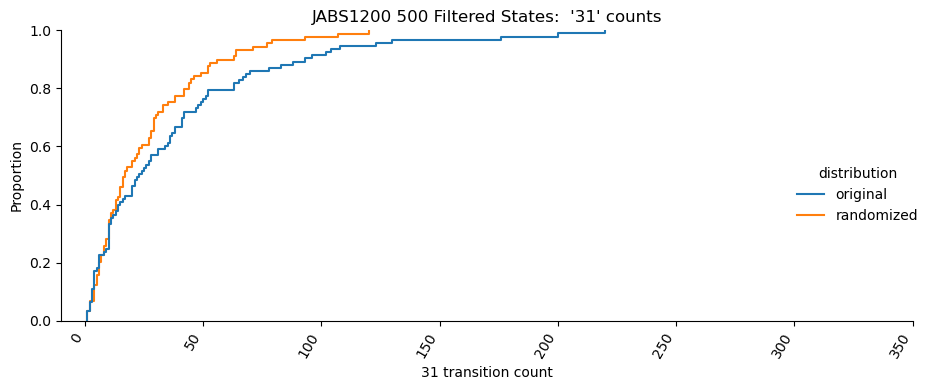

In [351]:
test_tran = '31'

origin_boot_df = origin_jab500_filt_countdf.copy()
origin_boot_df['distribution'] = 'original'

rand_boot_df = rand_jab500_filt_countdf.copy()
rand_boot_df['distribution'] = 'randomized'


boot_df = pd.concat([origin_boot_df, rand_boot_df], axis=0)
#print(boot_df.head())
#print(boot_df['distribution'].unique())

ax = sns.displot(data=boot_df[boot_df['target'] == test_tran], x='count', hue='distribution', kind='ecdf', height=4, aspect=2)

#plt.ylabel('Count')
plt.xlabel(f'{test_tran} transition count')
plt.title(f"JABS1200 500 Filtered States:  '{test_tran}' counts")

#plt.yticks(np.arange(0, 500, 25))
plt.xticks(np.arange(0, 400, 50))

ax.set_xticklabels(rotation=60, horizontalalignment='right')

plt.tight_layout()
plt.show()